In [1]:
%matplotlib inline

# 执行该文件，需要在所在仓库创建文件夹data，然后创建data/raw_data，将CK+原数据集数据放入data/raw_data中
# CK+数据集获取链接：http://www.consortium.ri.cmu.edu/ckagree/

本文件是将原数据集按照自己的想法进行处理。
---

比如CK+数据集主要两个文件夹：cohn-kanade-images 和 Emotion，前者是图片，后者是图片的类别
（Sxxx 表示表情对象的编号）

类别如下：（CK+数据集的介绍）
0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise

比如以下的代码是通过原数据集来生成整理好的CK+数据集

文件结构为：CK+下面是各类表情的文件夹，文件夹内是该表情的图片

该CK+数据集中可能存在无类别信息的图片，所以需要整理一下，筛选出有分类信息的数据。

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 原图片文件路径
original_data_dir_path = "data/raw_data/CK+/cohn-kanade-images"
# 表情图片的类别路径
refered_data_dir_path = "data/raw_data/CK+/Emotion"
# 构建后的路径
rebuild_dir_path = "data/CK+"

In [4]:
# 建立文件路径
if not os.path.exists(rebuild_dir_path):
    os.mkdir(rebuild_dir_path)
classes = ['neutral', 'anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
for c in classes:
    path = os.path.join(refered_data_dir_path, c)
    if not os.path.exists(os.path.join(rebuild_dir_path, c)):
        os.mkdir(os.path.join(rebuild_dir_path, c))

In [5]:
# 获取得到所有的实验对象编号
people_indexes = os.listdir(original_data_dir_path)
# print(people_indexes)
err_file_names = []
# 遍历编号，将编号内的图片整理
for index in people_indexes:
    print(index)
    if index[0] == ".":
        continue
    path = os.path.join(original_data_dir_path, index)
    sequence_indexes = os.listdir(path)
    for sequence_index in sequence_indexes:
        # 判断是否有图片，没有
        if sequence_index[0] == ".":
            continue
        path = os.path.join(original_data_dir_path, index, sequence_index)
        file_names = os.listdir(path)
        refered_path = os.path.join(refered_data_dir_path, index, sequence_index)
        # 判断是否有类别信息
        if not os.path.exists(refered_path):
            continue
        refered_file_names = os.listdir(refered_path)
#         print(file_names, refered_file_names)
        # 判断类别文件夹下面的文件是否有且仅有一个文件（没有文件则表示没有类别信息）
        if len(refered_file_names) == 1:
            with open(os.path.join(refered_path, refered_file_names[0])) as file:
                line = file.readline().strip()
                c = int(round(float(line), 0))
                # 把序列的后三张处理存到自己的文件夹
                for file_name in file_names[-3:]:
                    save_path = os.path.join(rebuild_dir_path, classes[c], file_name)
                    img = Image.open(os.path.join(original_data_dir_path, index, sequence_index, file_name))  # 在需要生成文件的时候开启
                    img.save(save_path)  # 在需要生成文件的时候开启
        else:
            print("length of refered_file_names error: %s | %s" % (refered_file_names, refered_path))


S005
S010
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S010\001
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S010\003
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S010\005
S011
S014
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S014\004
S022
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S022\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S022\003
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S022\004
S026
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S026\004
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S026\005
S028
S029
S032
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S032\002
S034
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S034\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S034\004
S035
length of refered_file_names erro

S095
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S095\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S095\003
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S095\004
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S095\005
S096
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S096\002
S097
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S097\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S097\003
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S097\005
S098
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S098\001
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S098\002
S099
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S099\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S099\003
S100
length of refered_file_names error: [] | data/raw_data/CK+

length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S122\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S122\004
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S122\005
S124
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S124\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S124\004
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S124\005
S125
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S125\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S125\003
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S125\004
S126
S127
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S127\002
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S127\003
S128
length of refered_file_names error: [] | data/raw_data/CK+/Emotion\S128\002
S129
length of refered_file_names error: [] | data/raw_data/CK+

上述执行完成后，在data/CK+文件夹下应该有981张图片
---

然后编写封装CK+ dataset，具体见：CKPlus_DataSet.py

以下代码是测试封装的效果

In [1]:
import sys
import torch
from CKPlus_DataSet import CKPlus
import transforms.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [18]:
input_img_size = 96
IMG_MEAN = [0.5]
IMG_STD = [0.225]
transform_train = transforms.Compose([
    transforms.Resize(input_img_size),  # 缩放将图片的最小边缩放为 input_img_size，因此如果输入是非正方形的，那么输出也不是正方形的
    transforms.CenterCrop(input_img_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
    transforms.Normalize(IMG_MEAN, IMG_STD),
])
transform_test = transforms.Compose([
    transforms.Resize(input_img_size),  # 缩放将图片的最小边缩放为 input_img_size，因此如果输入是非正方形的，那么输出也不是正方形的
    transforms.CenterCrop(input_img_size),
    transforms.ToTensor(),
    transforms.Normalize(IMG_MEAN, IMG_STD),
])
train_data = CKPlus(is_train=True, img_dir_pre_path="data/CK+", transform=transform_train)
test_data = CKPlus(is_train=False, img_dir_pre_path="data/CK+", transform=transform_test)

train_num:  906  test_num: 75
train_num:  906  test_num: 75


In [19]:
# 封装成loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False)
# 遍历
itr_train = enumerate(train_loader)
itr_test = enumerate(test_loader)

0
(4, 1, 96, 96)
(4,)
0
(4, 1, 96, 96)
(4,)
(1, 96, 96) 3
(1, 96, 96) 0


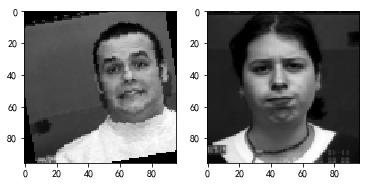

(1, 96, 96) 0
(1, 96, 96) 0


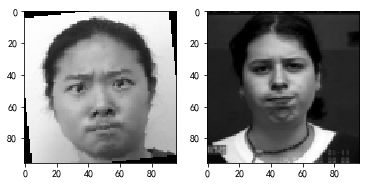

(1, 96, 96) 6
(1, 96, 96) 0


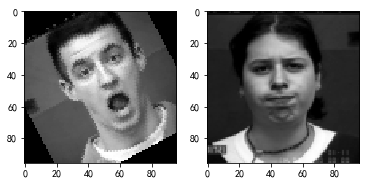

(1, 96, 96) 6
(1, 96, 96) 0


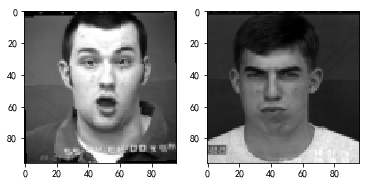

In [20]:
bs, (inputs, targets) = next(itr_train)
bs_test, (inputs_test, targets_test) = next(itr_test)
inputs, targets, inputs_test, targets_test = inputs.numpy(), targets.numpy(), inputs_test.numpy(), targets_test.numpy()
print(bs)
print(inputs.shape)
print(targets.shape)
print(bs_test)
print(inputs_test.shape)
print(targets_test.shape)
# 这里的4是因为封装成loader的时候设置的大小为4，每次取出来的数据是4个
for index in range(4):
    input = inputs[index]
    input_test = inputs_test[index]
    print(input.shape, targets[index])
    arr = input.reshape([input.shape[1], input.shape[2]])
    print(input_test.shape, targets_test[index])
    arr_test = input_test.reshape([input_test.shape[1], input_test.shape[2]])
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.imshow(arr, cmap="gray")
    ax = fig.add_subplot(122)
    ax.imshow(arr_test, cmap="gray")
    plt.show()